In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

In [8]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

Text(0, 0.5, '')

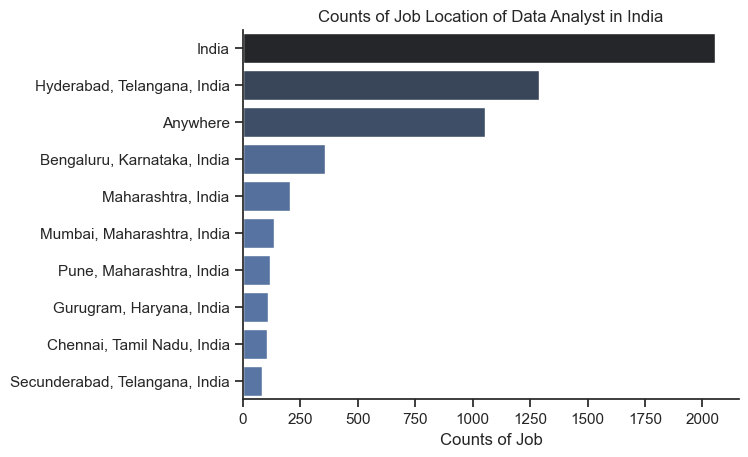

In [20]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Job Location of Data Analyst in India")
plt.xlabel("Counts of Job")
plt.ylabel("")

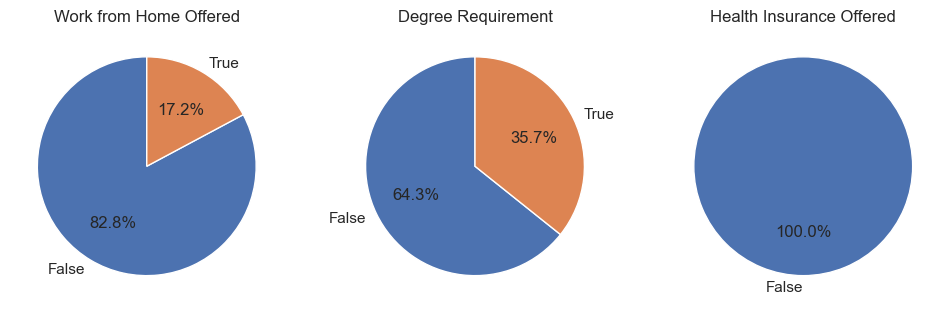

In [31]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_US[column].value_counts()
    ax[i].pie(counts, labels=counts.index.map({True: 'True', False: 'False'}), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

In [30]:
df_DA_US['job_health_insurance'].value_counts()

job_health_insurance
False    6121
Name: count, dtype: int64

Text(0, 0.5, '')

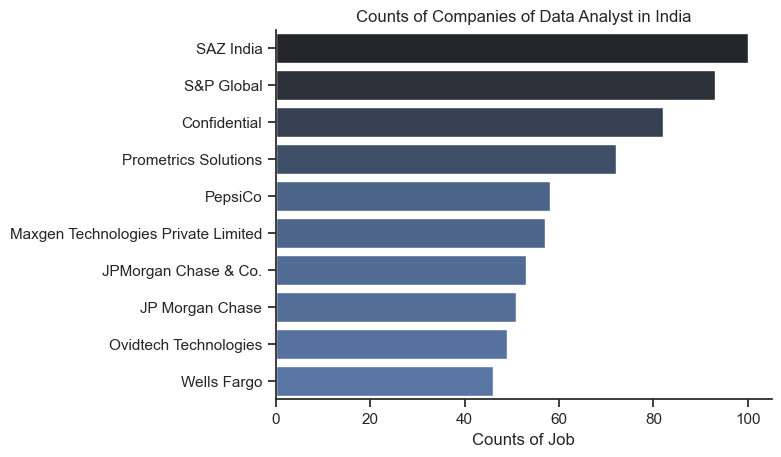

In [33]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Companies of Data Analyst in India")
plt.xlabel("Counts of Job")
plt.ylabel("")